In [1]:
# import basic packages
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import pypfopt
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

import yfinance as yf

# importing FinQuant's function to automatically build the portfolio
from finquant.portfolio import build_portfolio
from finquant.moving_average import sma,ema

In [2]:
# get the S&P 500
table=pd.read_html('https://en.wikipedia.org/wiki/list_of_S%26P_500_companies')
df = table[0]
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [3]:
df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [4]:
stocks_top50 = pd.read_csv('/home/nanwang/github/Fin/Top50.csv')
list_top50 = stocks_top50['Ticker'].tolist()
list_top50

['NVDA',
 'POOL',
 'CRM',
 'WST',
 'VRTX',
 'ADBE',
 'CDNS',
 'IRBT',
 'FIX',
 'LRCX',
 'INTU',
 'BBY',
 'BLK',
 'EXPD',
 'DECK',
 'MSFT',
 'AMAT',
 'IDXX',
 'TDOC',
 'RCM',
 'HBI',
 'HD',
 'PWR',
 'BCC',
 'A',
 'TROW',
 'FAST',
 'BWXT',
 'MTD',
 'PLD',
 'FDS',
 'EW',
 'PG',
 'RMD',
 'ZBRA',
 'KMB',
 'CMI',
 'GWW',
 'TRMB',
 'MLHR',
 'CLX',
 'BEAT',
 'EQIX',
 'TVTY',
 'KSU',
 'TXN',
 'PETQ',
 'DGX',
 'CHRW',
 'PDCO']

In [5]:
# tickers = list_top50 + ['^GSPC']
# benchmark = ['^GSPC']

# start_date = '2018-1-1'  # start day for lookback
# end_date = '2021-1-1'  # end day for lookback

# ohlc = yf.download(tickers,start=start_date, end=end_date)
# ohlc.head()

In [6]:
# prices = ohlc["Adj Close"]
names = list_top50 
pf = build_portfolio(names=names,start_date='2018-1-1', end_date='2020-1-1',data_api="yfinance")
pf_banchmark = build_portfolio(names=['^GSPC'],start_date='2018-1-1', end_date='2020-1-1',data_api="yfinance")
pf.data.head()

[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  1 of 1 completed


,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,IRBT,FIX,LRCX,...,CLX,BEAT,EQIX,TVTY,KSU,TXN,PETQ,DGX,CHRW,PDCO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,197.695740,127.088432,104.410004,98.066849,152.910004,177.699997,42.049999,80.099998,42.420475,178.389236,...,133.681931,30.450001,421.860779,36.650002,103.508995,96.645950,22.120001,92.403160,83.744781,32.553444
2018-01-03,210.706848,126.952820,105.290001,98.185112,152.009995,181.039993,42.930000,83.040001,41.932873,181.423981,...,132.243591,30.600000,423.805267,36.400002,103.441376,99.264198,21.490000,92.730148,83.511482,31.994833
2018-01-04,211.817535,127.931366,106.680000,98.155556,153.070007,183.220001,43.580002,80.919998,41.884136,182.253326,...,134.327332,31.200001,422.833008,36.599998,103.354446,99.136017,21.650000,92.571327,83.726105,32.201099
2018-01-05,213.612518,128.086411,108.099998,99.387543,155.690002,185.339996,43.990002,82.000000,41.201508,185.099594,...,134.364197,31.400000,424.286682,36.349998,105.469833,99.895859,21.370001,93.346802,83.586143,32.381561
2018-01-08,220.157761,127.388794,108.860001,99.949333,156.889999,185.039993,44.919998,81.779999,41.201508,186.494431,...,135.018829,29.750000,432.508301,36.299999,106.194283,100.371918,21.879999,93.562653,84.715302,32.467499


In [7]:
# Risk free rate
pf.risk_free_rate = 0.1
# Time window/frequency
pf.freq = 252

In [8]:
# ## Getting Skewness and Kurtosis of the stocks
print('Skewness of the stocks')
print(pf.skew)
print()
print('Kurtosis of the stocks')
print(pf.kurtosis)

Skewness of the stocks
NVDA    0.044826
POOL    0.445471
CRM    -0.717908
WST     0.472588
VRTX    0.889417
ADBE   -0.165431
CDNS    0.278273
IRBT    0.326287
FIX    -0.096127
LRCX    0.943187
INTU   -0.137225
BBY    -0.297918
BLK    -0.026377
EXPD   -0.671244
DECK   -0.043531
MSFT    0.438962
AMAT    0.009766
IDXX    0.078720
TDOC   -0.319130
RCM    -0.310446
HBI     0.239925
HD      0.546619
PWR     0.319194
BCC     0.068277
A       2.009914
TROW   -0.162400
FAST    0.524215
BWXT   -0.628683
MTD     0.573790
PLD     0.641298
FDS     0.371666
EW      0.606567
PG      0.292566
RMD     0.915005
ZBRA    0.302451
KMB     0.322722
CMI     0.489608
GWW     0.259959
TRMB   -0.058845
MLHR    0.577348
CLX    -0.764747
BEAT    0.336298
EQIX    0.604844
TVTY    0.096951
KSU     1.208431
TXN     0.285472
PETQ    0.576104
DGX    -0.660357
CHRW   -0.096831
PDCO    1.839830
dtype: float64

Kurtosis of the stocks
NVDA   -1.305900
POOL   -1.050389
CRM    -0.571113
WST    -0.882819
VRTX    1.235432
ADB

In [9]:
pf.comp_cumulative_returns().head()

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,IRBT,FIX,LRCX,...,CLX,BEAT,EQIX,TVTY,KSU,TXN,PETQ,DGX,CHRW,PDCO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.065814,-0.001067,0.008428,0.001206,-0.005886,0.018796,0.020927,0.036704,-0.011495,0.017012,...,-0.010759,0.004926,0.004609,-0.006821,-0.000653,0.027091,-0.028481,0.003539,-0.002786,-0.017160
2018-01-04,0.071432,0.006633,0.021741,0.000905,0.001046,0.031064,0.036385,0.010237,-0.012643,0.021661,...,0.004828,0.024631,0.002305,-0.001364,-0.001493,0.025765,-0.021248,0.001820,-0.000223,-0.010824
2018-01-05,0.080511,0.007853,0.035341,0.013467,0.018181,0.042994,0.046136,0.023720,-0.028735,0.037616,...,0.005104,0.031199,0.005750,-0.008186,0.018944,0.033627,-0.033906,0.010212,-0.001894,-0.005280
2018-01-08,0.113619,0.002363,0.042620,0.019196,0.026028,0.041306,0.068252,0.020974,-0.028735,0.045435,...,0.010001,-0.022989,0.025239,-0.009550,0.025943,0.038553,-0.010850,0.012548,0.011589,-0.002640


In [10]:
pf.comp_mean_returns().to_frame().T

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,IRBT,FIX,LRCX,...,CLX,BEAT,EQIX,TVTY,KSU,TXN,PETQ,DGX,CHRW,PDCO
0,0.190452,0.279233,0.267902,0.242511,0.226427,0.356098,0.292518,-0.073873,0.125065,0.313915,...,0.080126,0.3066,0.181567,-0.198285,0.221332,0.166414,0.19013,0.082464,-0.01442,-0.193768


In [11]:
pf.comp_daily_log_returns().head()

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,IRBT,FIX,LRCX,...,CLX,BEAT,EQIX,TVTY,KSU,TXN,PETQ,DGX,CHRW,PDCO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.063739,-0.001068,0.008393,0.001205,-0.005903,0.018621,0.020712,0.036047,-0.011561,0.016869,...,-0.010818,0.004914,0.004599,-0.006845,-0.000653,0.026731,-0.028895,0.003532,-0.002790,-0.017309
2018-01-04,0.005257,0.007678,0.013115,-0.000301,0.006949,0.011970,0.015027,-0.025861,-0.001163,0.004561,...,0.015634,0.019418,-0.002297,0.005479,-0.000841,-0.001292,0.007418,-0.001714,0.002567,0.006426
2018-01-05,0.008438,0.001211,0.013223,0.012473,0.016971,0.011504,0.009364,0.013258,-0.016432,0.015496,...,0.000274,0.006390,0.003432,-0.006854,0.020261,0.007635,-0.013017,0.008342,-0.001673,0.005589
2018-01-08,0.030181,-0.005461,0.007006,0.005637,0.007678,-0.001620,0.020921,-0.002687,0.000000,0.007507,...,0.004860,-0.053979,0.019192,-0.001376,0.006845,0.004754,0.023585,0.002310,0.013418,0.002650
2018-01-09,-0.000270,0.000000,0.002660,0.008836,-0.005625,0.008931,0.003334,-0.007487,-0.005935,-0.001568,...,-0.001914,0.010034,-0.004857,0.000000,0.004809,0.006817,0.013167,0.014440,0.007463,-0.011447


In [12]:
# daily percentage changes of returns
pf.comp_daily_returns().head()

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,IRBT,FIX,LRCX,...,CLX,BEAT,EQIX,TVTY,KSU,TXN,PETQ,DGX,CHRW,PDCO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.065814,-0.001067,0.008428,0.001206,-0.005886,0.018796,0.020927,0.036704,-0.011495,0.017012,...,-0.010759,0.004926,0.004609,-0.006821,-0.000653,0.027091,-0.028481,0.003539,-0.002786,-0.017160
2018-01-04,0.005271,0.007708,0.013202,-0.000301,0.006973,0.012042,0.015141,-0.025530,-0.001162,0.004571,...,0.015757,0.019608,-0.002294,0.005494,-0.000840,-0.001291,0.007445,-0.001713,0.002570,0.006447
2018-01-05,0.008474,0.001212,0.013311,0.012551,0.017116,0.011571,0.009408,0.013347,-0.016298,0.015617,...,0.000274,0.006410,0.003438,-0.006831,0.020467,0.007665,-0.012933,0.008377,-0.001672,0.005604
2018-01-08,0.030641,-0.005446,0.007031,0.005653,0.007708,-0.001619,0.021141,-0.002683,0.000000,0.007536,...,0.004872,-0.052548,0.019378,-0.001375,0.006869,0.004766,0.023865,0.002312,0.013509,0.002654
2018-01-09,-0.000270,0.000000,0.002664,0.008875,-0.005609,0.008971,0.003339,-0.007459,-0.005917,-0.001567,...,-0.001912,0.010084,-0.004845,0.000000,0.004821,0.006840,0.013254,0.014545,0.007491,-0.011381


In [13]:
# cumulative returns (price_{t} - price_{t=0}) / price_{t=0}
pf.comp_cumulative_returns().head()

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,IRBT,FIX,LRCX,...,CLX,BEAT,EQIX,TVTY,KSU,TXN,PETQ,DGX,CHRW,PDCO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.065814,-0.001067,0.008428,0.001206,-0.005886,0.018796,0.020927,0.036704,-0.011495,0.017012,...,-0.010759,0.004926,0.004609,-0.006821,-0.000653,0.027091,-0.028481,0.003539,-0.002786,-0.017160
2018-01-04,0.071432,0.006633,0.021741,0.000905,0.001046,0.031064,0.036385,0.010237,-0.012643,0.021661,...,0.004828,0.024631,0.002305,-0.001364,-0.001493,0.025765,-0.021248,0.001820,-0.000223,-0.010824
2018-01-05,0.080511,0.007853,0.035341,0.013467,0.018181,0.042994,0.046136,0.023720,-0.028735,0.037616,...,0.005104,0.031199,0.005750,-0.008186,0.018944,0.033627,-0.033906,0.010212,-0.001894,-0.005280
2018-01-08,0.113619,0.002363,0.042620,0.019196,0.026028,0.041306,0.068252,0.020974,-0.028735,0.045435,...,0.010001,-0.022989,0.025239,-0.009550,0.025943,0.038553,-0.010850,0.012548,0.011589,-0.002640


In [14]:
benchmark_ann_ret = pf_banchmark.comp_cumulative_returns().tail(1)['^GSPC']
benchmark_ann_ret

Date
2019-12-31    0.198445
Name: ^GSPC, dtype: float64

In [15]:
# 1. The current stock price is above both the 150-day and 200-day moving average
# 2. The 150-day moving average is above the 200-day moving average
# 3. The 200-day moving average line is trending up for at least 1 month
# 4. The 50-day moving average is above both the 150-day and 200-day moving averages
# 5. The current stock price is trading above the 50-day moving average
# 6. The current stock price is at least 30% above it’s 52-week low
# 7. The current stock price is within at least 25% of its 52-week high
# 8. The relative strength ranking (as reported in Investor’s Business Daily) is no less than 70. Preferably in the 80s or 90s.

# select stocks function
def screen(close: pd.Series, benchmark_ann_ret: float) -> pd.Series:
    # EMA 50,150,200
    ema_50 = ema(close, 50).iloc[-1]
    ema_150 = ema(close, 150).iloc[-1]
    ema_200 = ema(close, 200).iloc[-1]

    # The 20-day movement of the 200-day moving average is smooth to determine whether the 200-day moving average is rising
    ema_200_smooth = ema(ema(close, 200), 20).iloc[-1]

    # Closing 52-week highs and 52-week lows
    high_52week = close.rolling(52 * 5).max().iloc[-1]
    low_52week = close.rolling(52 * 5).min().iloc[-1]

    # Recent closing
    cl = float(close.iloc[-1])

    # 1. The current stock price is above both the 150-day and 200-day moving average
    if cl > ema_150 and cl > ema_200:
        condition_1 = True
    else:
        condition_1 = False

    # 2. The 150-day moving average is above the 200-day moving average
    if ema_150 > ema_200:
        condition_2 = True
    else:
        condition_2 = False

    # 3. The 200-day moving average line is trending up for at least 1 month
    if ema_200 > ema_200_smooth:
        condition_3 = True
    else:
        condition_3 = False

    # 4. The 50-day moving average is above both the 150-day and 200-day moving averages
    if ema_50 > ema_150 and ema_50 > ema_200:
        condition_4 = True
    else:
        condition_4 = False

    # 5. The current stock price is trading above the 50-day moving average
    if cl > ema_50:
        condition_5 = True
    else:
        condition_5 = False

    # 6. The current stock price is at least 30% above it’s 52-week low
    if cl >= low_52week * 1.3:
        condition_6 = True
    else:
        condition_6 = False

    # 7. The current stock price is within at least 25% of its 52-week high
    if cl >= high_52week * 0.75 and cl <= high_52week * 1.25:
        condition_7 = True
    else:
        condition_7 = False

    # 8. The relative strength ranking (as reported in Investor’s Business Daily) is no less than 70. Preferably in the 80s or 90s.
    rs = close.pct_change(252).iloc[-1] / float(benchmark_ann_ret) * 100
    if rs >= 70:
        condition_8 = True
    else:
        condition_8 = False


    # 判断股票是否符合标准
    if (condition_1 and condition_2 and condition_3 and
        condition_4 and condition_5 and condition_6 and
        condition_7 and condition_8):
        meet_criterion = True
    else:
        meet_criterion = False

    out = {
        "rs": round(rs, 2),
        "close": cl,
        "ema_50": ema_50,
        "ema_150": ema_150,
        "ema_200": ema_200,
        "high_52week": high_52week,
        "low_52week": low_52week,
        "meet_criterion": meet_criterion
    }

    return pd.Series(out)




In [16]:


results = pf.data.apply(screen, benchmark_ann_ret=benchmark_ann_ret)
results = results.T
results


,rs,close,ema_50,ema_150,ema_200,high_52week,low_52week,meet_criterion
NVDA,387.73,234.912,214.665,193.484,190.491,238.976,126.377,True
POOL,224.26,210.506,205.487,194.788,189.854,214.961,135.837,True
CRM,94.44,162.64,159.399,155.469,154.069,166.95,121.33,True
WST,272.78,149.775,146.521,137.955,134.002,150.652,92.1879,True
VRTX,161.9,218.95,210.169,193.751,190.025,223.91,151.91,True
ADBE,230.69,329.81,306.186,290.636,285.518,331.2,205.16,True
CDNS,299.94,69.36,68.0109,66.5086,65.0722,76.35,40.31,True
IRBT,-199.24,50.63,50.408,63.3862,68.1232,130.78,43.56,False
FIX,75.95,49.3411,48.6818,47.259,47.266,56.7946,36.1257,False
LRCX,601.34,287.653,267.139,234.09,223.665,292.582,118.734,True


In [17]:
meet_criterion = results[results['meet_criterion'] == True]
meet_criterion

,rs,close,ema_50,ema_150,ema_200,high_52week,low_52week,meet_criterion
NVDA,387.73,234.912,214.665,193.484,190.491,238.976,126.377,True
POOL,224.26,210.506,205.487,194.788,189.854,214.961,135.837,True
CRM,94.44,162.64,159.399,155.469,154.069,166.95,121.33,True
WST,272.78,149.775,146.521,137.955,134.002,150.652,92.1879,True
VRTX,161.9,218.95,210.169,193.751,190.025,223.91,151.91,True
ADBE,230.69,329.81,306.186,290.636,285.518,331.2,205.16,True
CDNS,299.94,69.36,68.0109,66.5086,65.0722,76.35,40.31,True
LRCX,601.34,287.653,267.139,234.09,223.665,292.582,118.734,True
BBY,355.27,85.4995,77.7245,71.4407,70.1482,86.3174,45.6765,True
BLK,160.58,490.16,471.642,448.386,443.879,490.686,342.331,True


In [18]:
portfolio = meet_criterion.T
portfolio

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,LRCX,BBY,BLK,...,PG,RMD,ZBRA,KMB,GWW,TRMB,EQIX,KSU,TXN,DGX
rs,387.73,224.26,94.44,272.78,161.9,230.69,299.94,601.34,355.27,160.58,...,200.06,190.71,304.48,123.84,112.12,134.44,347,314.16,199.37,156.87
close,234.912,210.506,162.64,149.775,218.95,329.81,69.36,287.653,85.4995,490.16,...,121.159,153.662,255.44,133.558,332.394,41.69,574.931,151.705,123.872,103.964
ema_50,214.665,205.487,159.399,146.521,210.169,306.186,68.0109,267.139,77.7245,471.642,...,119.319,146.942,242.875,131.276,316.056,40.3579,553.009,147.315,119.468,102.366
ema_150,193.484,194.788,155.469,137.955,193.751,290.636,66.5086,234.09,71.4407,448.386,...,113.733,134.44,220.984,128.471,297.547,39.9509,526.543,134.853,115.823,99.3717
ema_200,190.491,189.854,154.069,134.002,190.025,285.518,65.0722,223.665,70.1482,443.879,...,110.715,130.035,214.109,126.463,293.867,39.8453,512.755,130.782,113.902,98.2813
high_52week,238.976,214.961,166.95,150.652,223.91,331.2,76.35,292.582,86.3174,490.686,...,122.313,155.377,258.28,136.904,332.777,45.94,574.931,153.229,126.203,105.132
low_52week,126.377,135.837,121.33,92.1879,151.91,205.16,40.31,118.734,45.6765,342.331,...,82.4251,89.633,142.9,100.54,251.408,30.16,327.399,88.6003,82.4638,75.9312
meet_criterion,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [19]:
tickers = portfolio.columns.to_list()
market_prices = pf.data[tickers]

market_prices.head()

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,LRCX,BBY,BLK,...,PG,RMD,ZBRA,KMB,GWW,TRMB,EQIX,KSU,TXN,DGX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,197.695740,127.088432,104.410004,98.066849,152.910004,177.699997,42.049999,178.389236,63.819813,469.751709,...,82.617447,82.547127,103.709999,108.023033,222.932281,41.060001,421.860779,103.508995,96.645950,92.403160
2018-01-03,210.706848,126.952820,105.290001,98.185112,152.009995,181.039993,42.930000,181.423981,63.118492,474.707947,...,82.517197,83.406067,105.769997,106.217659,221.532486,42.189999,423.805267,103.441376,99.264198,92.730148
2018-01-04,211.817535,127.931366,106.680000,98.155556,153.070007,183.220001,43.580002,182.253326,62.084965,480.974701,...,83.100464,83.521904,107.860001,107.442413,223.263260,42.849998,422.833008,103.354446,99.136017,92.571327
2018-01-05,213.612518,128.086411,108.099998,99.387543,155.690002,185.339996,43.990002,185.099594,63.552189,485.072662,...,83.155174,84.631798,109.540001,107.206520,225.334564,43.000000,424.286682,105.469833,99.895859,93.346802
2018-01-08,220.157761,127.388794,108.860001,99.949333,156.889999,185.039993,44.919998,186.494431,64.308876,488.690521,...,83.592636,85.114365,110.629997,108.349640,225.334564,43.009998,432.508301,106.194283,100.371918,93.562653


In [20]:
# mcaps = {}
# for t in tickers:
#     stock = yf.Ticker(t)
#     mcaps[t] = stock.info["marketCap"]
# mcaps

In [21]:
S = risk_models.CovarianceShrinkage(market_prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

NVDA    0.836862
POOL    4.988593
CRM     2.732004
WST     3.702397
VRTX    2.207158
ADBE    3.687178
CDNS    3.269369
LRCX    1.959918
BBY     1.627950
BLK     0.525366
DECK    3.690351
MSFT    5.545433
AMAT    0.967756
IDXX    3.532917
TDOC    2.089953
RCM     2.741417
PWR     0.519615
BCC     0.352862
TROW    2.046021
FAST    2.421490
BWXT    0.578537
MTD     2.112331
PLD     4.847167
FDS     3.876779
PG      5.820584
RMD     4.063181
ZBRA    3.306860
KMB     2.299848
GWW     2.320526
TRMB    0.352843
EQIX    3.096846
KSU     3.414957
TXN     1.756323
DGX     1.349362
dtype: float64

In [22]:
# covariance matrix
cr = risk_models.cov_to_corr(S)
cr

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,LRCX,BBY,BLK,...,PG,RMD,ZBRA,KMB,GWW,TRMB,EQIX,KSU,TXN,DGX
NVDA,1.000000,0.293872,0.539817,0.355628,0.401005,0.568721,0.498360,0.563085,0.413904,0.502601,...,0.130358,0.348492,0.437378,0.105462,0.265799,0.533172,0.186634,0.366867,0.625287,0.293897
POOL,0.293872,1.000000,0.374058,0.305994,0.235102,0.376368,0.304884,0.261095,0.308993,0.347171,...,0.266238,0.297171,0.263630,0.220478,0.299314,0.315850,0.117604,0.357043,0.286241,0.299677
CRM,0.539817,0.374058,1.000000,0.399562,0.462200,0.775720,0.532649,0.434441,0.357958,0.499691,...,0.181920,0.365772,0.457019,0.094225,0.278357,0.488800,0.227977,0.350530,0.465850,0.300902
WST,0.355628,0.305994,0.399562,1.000000,0.329477,0.404777,0.379884,0.339226,0.294628,0.349657,...,0.199700,0.324222,0.297804,0.179065,0.177160,0.388665,0.260021,0.276955,0.345170,0.313021
VRTX,0.401005,0.235102,0.462200,0.329477,1.000000,0.504429,0.362070,0.381052,0.243545,0.399623,...,0.168612,0.351413,0.359295,0.141450,0.194889,0.369691,0.241209,0.280904,0.402465,0.322502
ADBE,0.568721,0.376368,0.775720,0.404777,0.504429,1.000000,0.608269,0.469344,0.375699,0.495599,...,0.170834,0.415353,0.444552,0.112287,0.229954,0.497667,0.272193,0.360819,0.513783,0.318073
CDNS,0.498360,0.304884,0.532649,0.379884,0.362070,0.608269,1.000000,0.495867,0.333352,0.490168,...,0.202695,0.345630,0.390753,0.167615,0.236139,0.473759,0.293152,0.343343,0.538652,0.281452
LRCX,0.563085,0.261095,0.434441,0.339226,0.381052,0.469344,0.495867,1.000000,0.356566,0.524341,...,0.215096,0.300768,0.331220,0.137381,0.240482,0.478824,0.233305,0.427504,0.668799,0.205434
BBY,0.413904,0.308993,0.357958,0.294628,0.243545,0.375699,0.333352,0.356566,1.000000,0.419361,...,0.147911,0.196365,0.323461,0.081244,0.273215,0.432919,0.086122,0.357162,0.429603,0.249279
BLK,0.502601,0.347171,0.499691,0.349657,0.399623,0.495599,0.490168,0.524341,0.419361,1.000000,...,0.256552,0.317032,0.396222,0.197476,0.459590,0.520803,0.176930,0.545975,0.540221,0.373301


<Figure size 720x720 with 0 Axes>

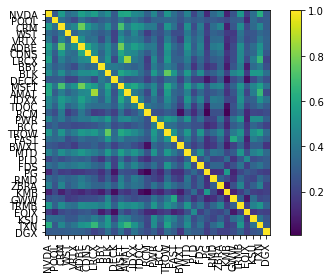

In [23]:
plt.figure(figsize=(10, 10))
plotting.plot_covariance(cr, plot_correlation=True)
plt.show()

In [24]:
# Covariance Matrix
S

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,LRCX,BBY,BLK,...,PG,RMD,ZBRA,KMB,GWW,TRMB,EQIX,KSU,TXN,DGX
NVDA,0.200277,0.030266,0.072721,0.039263,0.054821,0.076784,0.064425,0.096983,0.061888,0.053833,...,0.010745,0.044732,0.076239,0.010472,0.037297,0.070043,0.019258,0.040133,0.080837,0.028652
POOL,0.030266,0.052964,0.025913,0.017373,0.016528,0.026131,0.020268,0.023126,0.023759,0.019122,...,0.011286,0.019616,0.023631,0.011259,0.021598,0.021338,0.006240,0.020086,0.019030,0.015024
CRM,0.072721,0.025913,0.090613,0.029672,0.042502,0.070446,0.046316,0.050330,0.036001,0.036001,...,0.010087,0.031580,0.053584,0.006293,0.026273,0.043192,0.015823,0.025793,0.040510,0.019731
WST,0.039263,0.017373,0.029672,0.060862,0.024830,0.030126,0.027072,0.032208,0.024285,0.020646,...,0.009074,0.022942,0.028616,0.009802,0.013704,0.028147,0.014791,0.016702,0.024599,0.016822
VRTX,0.054821,0.016528,0.042502,0.024830,0.093319,0.046488,0.031950,0.044800,0.024857,0.029218,...,0.009487,0.030790,0.042751,0.009588,0.018667,0.033152,0.016990,0.020976,0.035517,0.021461
ADBE,0.076784,0.026131,0.070446,0.030126,0.046488,0.091015,0.053009,0.054494,0.037869,0.035785,...,0.009493,0.035940,0.052238,0.007516,0.021752,0.044073,0.018934,0.026609,0.044777,0.020904
CDNS,0.064425,0.020268,0.046316,0.027072,0.031950,0.053009,0.083443,0.055127,0.032173,0.033888,...,0.010785,0.028636,0.043965,0.010743,0.021388,0.040173,0.019525,0.024244,0.044949,0.017711
LRCX,0.096983,0.023126,0.050330,0.032208,0.044800,0.054494,0.055127,0.148118,0.045849,0.048298,...,0.015248,0.033201,0.049651,0.011732,0.029020,0.054095,0.020703,0.040218,0.074356,0.017223
BBY,0.061888,0.023759,0.036001,0.024285,0.024857,0.037869,0.032173,0.045849,0.111630,0.033534,...,0.009102,0.018818,0.042094,0.006023,0.028622,0.042460,0.006635,0.029170,0.041464,0.018143
BLK,0.053833,0.019122,0.036001,0.020646,0.029218,0.035785,0.033888,0.048298,0.033534,0.057283,...,0.011310,0.021763,0.036937,0.010487,0.034490,0.036590,0.009764,0.031942,0.037351,0.019463


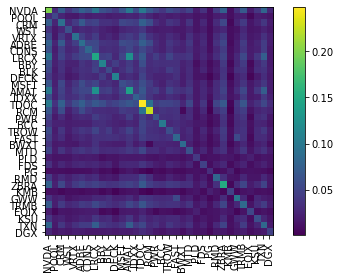

In [25]:

plotting.plot_covariance(S);

In [26]:
pf = build_portfolio(data=market_prices)
pf.data.head()

,NVDA,POOL,CRM,WST,VRTX,ADBE,CDNS,LRCX,BBY,BLK,...,PG,RMD,ZBRA,KMB,GWW,TRMB,EQIX,KSU,TXN,DGX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,197.695740,127.088432,104.410004,98.066849,152.910004,177.699997,42.049999,178.389236,63.819813,469.751709,...,82.617447,82.547127,103.709999,108.023033,222.932281,41.060001,421.860779,103.508995,96.645950,92.403160
2018-01-03,210.706848,126.952820,105.290001,98.185112,152.009995,181.039993,42.930000,181.423981,63.118492,474.707947,...,82.517197,83.406067,105.769997,106.217659,221.532486,42.189999,423.805267,103.441376,99.264198,92.730148
2018-01-04,211.817535,127.931366,106.680000,98.155556,153.070007,183.220001,43.580002,182.253326,62.084965,480.974701,...,83.100464,83.521904,107.860001,107.442413,223.263260,42.849998,422.833008,103.354446,99.136017,92.571327
2018-01-05,213.612518,128.086411,108.099998,99.387543,155.690002,185.339996,43.990002,185.099594,63.552189,485.072662,...,83.155174,84.631798,109.540001,107.206520,225.334564,43.000000,424.286682,105.469833,99.895859,93.346802
2018-01-08,220.157761,127.388794,108.860001,99.949333,156.889999,185.039993,44.919998,186.494431,64.308876,488.690521,...,83.592636,85.114365,110.629997,108.349640,225.334564,43.009998,432.508301,106.194283,100.371918,93.562653


In [27]:
# 1. set the new value(s)
pf.freq = 252
pf.risk_free_rate = 0.1

# 2.a compute and get new values based on new freq/risk_free_rate
exret = pf.comp_expected_return(freq=252)
vol = pf.comp_volatility(freq=252)
sharpe = pf.comp_sharpe()
print(
    "For {} trading days and a risk free rate of {}:".format(pf.freq, pf.risk_free_rate)
)
print("Expected return: {:0.3f}".format(exret))
print("Volatility: {:0.3f}".format(vol))
print("Sharpe Ratio: {:0.3f}".format(sharpe))

# 2.b print out properties of portfolio (which is based on new freq/risk_free_rate)
pf.properties()

For 252 trading days and a risk free rate of 0.1:
Expected return: 0.239
Volatility: 0.180
Sharpe Ratio: 0.775
----------------------------------------------------------------------
Stocks: NVDA, POOL, CRM, WST, VRTX, ADBE, CDNS, LRCX, BBY, BLK, DECK, MSFT, AMAT, IDXX, TDOC, RCM, PWR, BCC, TROW, FAST, BWXT, MTD, PLD, FDS, PG, RMD, ZBRA, KMB, GWW, TRMB, EQIX, KSU, TXN, DGX
Time window/frequency: 252
Risk free rate: 0.1
Portfolio Expected Return: 0.239
Portfolio Volatility: 0.180
Portfolio Sharpe Ratio: 0.775

Skewness:
       NVDA      POOL       CRM       WST      VRTX      ADBE      CDNS  \
0  0.044826  0.445471 -0.717908  0.472588  0.889417 -0.165431  0.278273   

       LRCX       BBY       BLK  ...        PG       RMD      ZBRA       KMB  \
0  0.943187 -0.297918 -0.026377  ...  0.292566  0.915005  0.302451  0.322722   

        GWW      TRMB      EQIX       KSU       TXN       DGX  
0  0.259959 -0.058845  0.604844  1.208431  0.285472 -0.660357  

[1 rows x 34 columns]

Kurtosis:
  

In [28]:
pf.ef_minimum_volatility(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.195
Annual Volatility: 0.128
Sharpe Ratio: 0.741

Optimal weights:
                    NVDA      POOL  CRM       WST  VRTX          ADBE  CDNS  \
Allocation  1.395008e-17  0.051086  0.0  0.032611   0.0  5.813867e-18   0.0   

            LRCX  BBY           BLK  ...        PG       RMD  ZBRA       KMB  \
Allocation   0.0  0.0  1.639723e-17  ...  0.255031  0.026512   0.0  0.065758   

                 GWW  TRMB      EQIX       KSU  TXN      DGX  
Allocation  0.037843   0.0  0.110124  0.025397  0.0  0.12509  

[1 rows x 34 columns]
----------------------------------------------------------------------


,Allocation
NVDA,1.395008e-17
POOL,5.108557e-02
CRM,0.000000e+00
WST,3.261114e-02
VRTX,0.000000e+00
ADBE,5.813867e-18
CDNS,0.000000e+00
LRCX,0.000000e+00
BBY,0.000000e+00
BLK,1.639723e-17


In [29]:
pf.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.416
Annual Volatility: 0.195
Sharpe Ratio: 1.626

Optimal weights:
                    NVDA      POOL           CRM           WST          VRTX  \
Allocation  1.107722e-15  0.026015  3.437827e-16  3.198431e-17  2.964653e-16   

                    ADBE          CDNS  LRCX           BBY           BLK  ...  \
Allocation  1.675841e-16  2.155643e-16   0.0  1.617960e-16  2.469798e-16  ...   

                  PG       RMD      ZBRA           KMB           GWW  \
Allocation  0.270767  0.135753  0.159356  6.786987e-17  1.636108e-16   

                    TRMB          EQIX           KSU           TXN  \
Allocation  6.849980e-16  5.072795e-16  5.372275e-17  4.197126e-16   

                     DGX  
Allocation  2.685300e-16  

[1 rows x 34 columns]
--------------------------------------------------------

,Allocation
NVDA,1.107722e-15
POOL,2.601459e-02
CRM,3.437827e-16
WST,3.198431e-17
VRTX,2.964653e-16
ADBE,1.675841e-16
CDNS,2.155643e-16
LRCX,0.000000e+00
BBY,1.617960e-16
BLK,2.469798e-16


In [30]:
# optimisation for maximum Sharpe ratio
opt_weights = pf.ef_maximum_sharpe_ratio()

opt_weights[opt_weights['Allocation']> 0.001]

,Allocation
POOL,0.026015
DECK,0.200255
TDOC,0.011947
RCM,0.195908
PG,0.270767
RMD,0.135753
ZBRA,0.159356


In [32]:

lst = opt_weights[opt_weights['Allocation']> 0.001].index.tolist()
lst

['POOL', 'DECK', 'TDOC', 'RCM', 'PG', 'RMD', 'ZBRA']

In [49]:
start_date_new = '2020-1-1'
end_date_new = '2021-1-1'

In [54]:
pf_portfolio = build_portfolio(names=lst,start_date=start_date_new, end_date=end_date_new,data_api="yfinance")
pf_portfolio.data.head()

[*********************100%***********************]  7 of 7 completed


,POOL,DECK,TDOC,RCM,PG,RMD,ZBRA
Date,,,,,,,
2020-01-02,211.923370,172.169998,83.260002,12.690,119.713371,154.792099,259.140015
2020-01-03,213.142517,173.460007,82.959999,12.470,118.908234,153.979019,256.049988
2020-01-06,213.182159,174.500000,86.940002,12.500,119.073143,154.712769,258.010010
2020-01-07,211.140350,173.149994,85.730003,12.540,118.335899,153.840195,256.470001
2020-01-08,212.210815,168.830002,86.220001,12.865,118.840317,154.950745,247.639999


In [34]:

pf_portfolio.freq = 252
pf_portfolio.risk_free_rate = 0.1


In [35]:
pf_portfolio.ef_minimum_volatility(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.391
Annual Volatility: 0.302
Sharpe Ratio: 0.964

Optimal weights:
                    POOL     DECK      TDOC       RCM       PG           RMD  \
Allocation  8.206739e-18  0.10532  0.125758  0.041992  0.72693  2.152089e-17   

                    ZBRA  
Allocation  2.251042e-18  
----------------------------------------------------------------------


,Allocation
POOL,8.206739e-18
DECK,1.053199e-01
TDOC,1.257580e-01
RCM,4.199241e-02
PG,7.269296e-01
RMD,2.152089e-17
ZBRA,2.251042e-18


In [36]:
# optimisation for maximum Sharpe ratio
maximum_Sharpe_ratio = pf_portfolio.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.916
Annual Volatility: 0.425
Sharpe Ratio: 1.922

Optimal weights:
                POOL      DECK      TDOC       RCM   PG  RMD          ZBRA
Allocation  0.118595  0.133394  0.422659  0.325353  0.0  0.0  1.851275e-17
----------------------------------------------------------------------


In [37]:
# minimum volatility for a given target return of 0.26
minimum = pf_portfolio.ef_efficient_return(0.5, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Return

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.500
Annual Volatility: 0.309
Sharpe Ratio: 1.295

Optimal weights:
                POOL      DECK      TDOC       RCM        PG           RMD  \
Allocation  0.010218  0.124038  0.186907  0.101507  0.576225  4.119968e-18   

                ZBRA  
Allocation  0.001104  
----------------------------------------------------------------------


In [39]:
# maximum Sharpe ratio for a given target volatility of 0.22
maximum = pf_portfolio.ef_efficient_volatility(0.4, verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Volatility

Time window/frequency: 252
Risk free rate: 0.1
Expected annual Return: 0.860
Annual Volatility: 0.400
Sharpe Ratio: 1.900

Optimal weights:
                POOL      DECK      TDOC       RCM            PG       RMD  \
Allocation  0.153879  0.140398  0.354089  0.269617  1.770299e-18  0.053395   

                ZBRA  
Allocation  0.028622  
----------------------------------------------------------------------


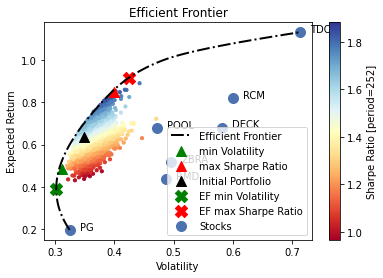

In [40]:
# Monte Carlo optimisation
opt_w, opt_res = pf_portfolio.mc_optimisation(num_trials=5000)
pf_portfolio.mc_plot_results()
# minimisation to compute efficient frontier and optimal portfolios along it
pf_portfolio.ef_plot_efrontier()
pf_portfolio.ef.plot_optimal_portfolios()
# plotting individual stocks
pf_portfolio.plot_stocks()

In [41]:
lst

['POOL', 'DECK', 'TDOC', 'RCM', 'PG', 'RMD', 'ZBRA']

In [42]:
pf_portfolio.data[lst]

,POOL,DECK,TDOC,RCM,PG,RMD,ZBRA
Date,,,,,,,
2020-01-02,211.923370,172.169998,83.260002,12.690000,119.713371,154.792099,259.140015
2020-01-03,213.142517,173.460007,82.959999,12.470000,118.908234,153.979019,256.049988
2020-01-06,213.182159,174.500000,86.940002,12.500000,119.073143,154.712769,258.010010
2020-01-07,211.140350,173.149994,85.730003,12.540000,118.335899,153.840195,256.470001
2020-01-08,212.210815,168.830002,86.220001,12.865000,118.840317,154.950745,247.639999
...,...,...,...,...,...,...,...
2020-12-24,364.730011,292.739990,207.949997,23.590000,136.894287,212.419998,376.890015
2020-12-28,362.760010,290.929993,197.830002,23.930000,137.848526,211.429993,382.589996
2020-12-29,364.040009,287.450012,198.979996,23.879999,137.590088,211.259995,378.040009


In [43]:
minimum.Allocation

POOL    1.021766e-02
DECK    1.240384e-01
TDOC    1.869073e-01
RCM     1.015072e-01
PG      5.762251e-01
RMD     4.119968e-18
ZBRA    1.104391e-03
Name: Allocation, dtype: float64

In [44]:
p_data = pf_portfolio.data[lst]*maximum_Sharpe_ratio.Allocation
p_data.head()

,POOL,DECK,TDOC,RCM,PG,RMD,ZBRA
Date,,,,,,,
2020-01-02,25.133082,22.966373,35.190563,4.128724,0.0,0.0,4.797395e-15
2020-01-03,25.277667,23.138452,35.063765,4.057147,0.0,0.0,4.740190e-15
2020-01-06,25.282368,23.277180,36.745948,4.066907,0.0,0.0,4.776475e-15
2020-01-07,25.040219,23.097098,36.234531,4.079921,0.0,0.0,4.747966e-15
2020-01-08,25.167171,22.520839,36.441633,4.185661,0.0,0.0,4.584498e-15


In [45]:
p_data['Portfolio'] = p_data.apply(lambda x: x.sum(), axis=1)
p_data.head()

,POOL,DECK,TDOC,RCM,PG,RMD,ZBRA,Portfolio
Date,,,,,,,,
2020-01-02,25.133082,22.966373,35.190563,4.128724,0.0,0.0,4.797395e-15,87.418742
2020-01-03,25.277667,23.138452,35.063765,4.057147,0.0,0.0,4.740190e-15,87.537030
2020-01-06,25.282368,23.277180,36.745948,4.066907,0.0,0.0,4.776475e-15,89.372403
2020-01-07,25.040219,23.097098,36.234531,4.079921,0.0,0.0,4.747966e-15,88.451770
2020-01-08,25.167171,22.520839,36.441633,4.185661,0.0,0.0,4.584498e-15,88.315304


<AxesSubplot:xlabel='Date'>

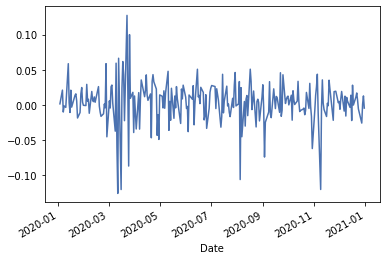

In [46]:
p_data['Portfolio'].pct_change().plot()

<AxesSubplot:>

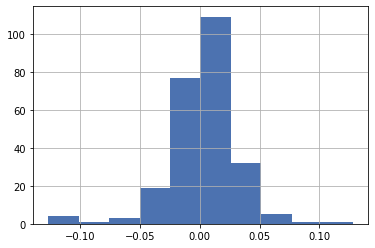

In [47]:
p_data['Portfolio'].pct_change().hist()

In [52]:
pf_banchmark_new = build_portfolio(names=['^GSPC'],start_date=start_date_new, end_date=end_date_new,data_api="yfinance")
pf_banchmark_new.data

[*********************100%***********************]  1 of 1 completed


,^GSPC
Date,
2020-01-02,3257.850098
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049
...,...
2020-12-24,3703.060059
2020-12-28,3735.360107
2020-12-29,3727.040039


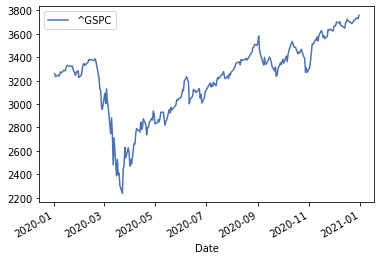

In [53]:
pf_banchmark_new.data.plot()
pf_banchmark_new.freq = 252
pf_banchmark_new.risk_free_rate = 0.1

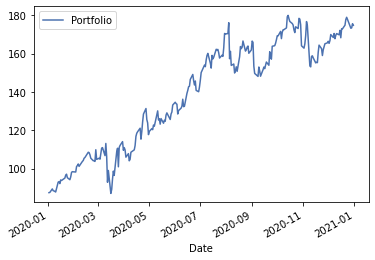

In [57]:
pf2 = build_portfolio(data=p_data['Portfolio'].to_frame())
pf2.data.plot()
pf2.freq = 252
pf2.risk_free_rate = 0.1

In [59]:
pf_banchmark_new.properties()

----------------------------------------------------------------------
Stocks: ^GSPC
Time window/frequency: 252
Risk free rate: 0.1
Portfolio Expected Return: 0.202
Portfolio Volatility: 0.345
Portfolio Sharpe Ratio: 0.296

Skewness:
      ^GSPC
0 -0.702417

Kurtosis:
      ^GSPC
0  0.189022

Information:
   Allocation   Name
0         1.0  ^GSPC
----------------------------------------------------------------------


In [60]:
pf2.properties()

----------------------------------------------------------------------
Stocks: Portfolio
Time window/frequency: 252
Risk free rate: 0.1
Portfolio Expected Return: 0.805
Portfolio Volatility: 0.470
Portfolio Sharpe Ratio: 1.502

Skewness:
   Portfolio
0   -0.31436

Kurtosis:
   Portfolio
0  -1.340084

Information:
   Allocation       Name
0         1.0  Portfolio
----------------------------------------------------------------------


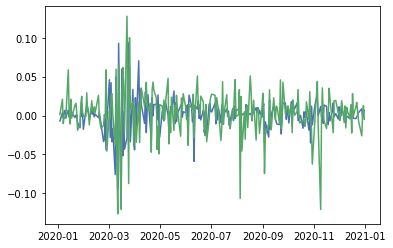

In [61]:
plt.plot(pf_banchmark_new.comp_daily_returns())
plt.plot(pf2.comp_daily_returns())

(array([  4.,   1.,   3.,  19.,  77., 109.,  32.,   5.,   1.,   1.]),
 array([-0.12656111, -0.10113495, -0.07570879, -0.05028263, -0.02485646,
         0.0005697 ,  0.02599586,  0.05142202,  0.07684819,  0.10227435,
         0.12770051]),
 <BarContainer object of 10 artists>)

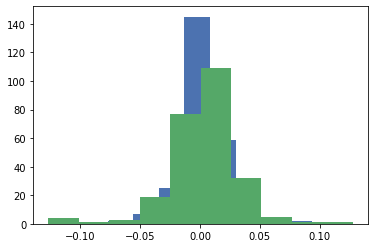

In [62]:
plt.hist(pf_banchmark_new.comp_daily_returns())
plt.hist(pf2.comp_daily_returns())

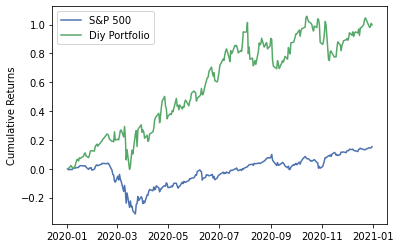

In [67]:
plt.plot(pf_banchmark_new.comp_cumulative_returns(),label='S&P 500')
plt.plot(pf2.comp_cumulative_returns(), label='Diy Portfolio')
plt.ylabel('Cumulative Returns') 
plt.legend()
plt.savefig('books_read.png')

In [65]:
pf_banchmark_new.comp_cumulative_returns().tail(1)

,^GSPC
Date,
2020-12-31,0.152929


In [66]:
pf2.comp_cumulative_returns().tail(1)

,Portfolio
Date,
2020-12-31,0.999126
